# Task 3 - Exploratory Data Project

Beth Harvey
Data Analytics Fundamentals Project 6
February 13, 2023

In [1]:
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Load Data

In [2]:
df = pd.read_csv('bird_migration.csv', index_col='Unnamed: 0')

This dataset contains GPS tracking data for the migration of 3 gulls (Eric, Sanne, and Nico) from the LifeWatch research institute. More information can be found at https://www.gbif.org/dataset/83e20573-f7dd-4852-9159-21566e1e691e. The dataset is no longer available there, but it can be found at https://www.kaggle.com/datasets/turhancankargin/bird-migration.

## View Data

In [3]:
# View first 5 and last 5 rows of data
df.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [4]:
df.tail()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne
61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne
61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne
61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne
61919,9,2014-04-30 23:59:34+00,833,149.949008,51.354474,3.181057,0.485489,Sanne


## Explore Data

In [5]:
pd.set_option('display.precision', 2)

# Describe numeric data
df.describe()

,altitude,device_info_serial,direction,latitude,longitude,speed_2d
count,61920.00,61920.00,61477.00,61920.00,61920.00,61477.00
mean,52.31,849.33,-4.61,30.23,-8.95,2.56
std,136.44,12.84,102.79,14.81,8.48,3.58
min,-1010.00,833.00,-180.00,12.35,-17.63,0.00
25%,2.00,833.00,-89.68,15.39,-16.76,0.41
50%,14.00,851.00,-10.98,30.42,-9.66,1.21
75%,84.00,864.00,81.96,50.00,2.60,3.06
max,6965.00,864.00,180.00,51.52,4.86,63.49


In [6]:
# Describe categorical column: bird_name
df.bird_name.describe()

count     61920
unique        3
top        Nico
freq      21121
Name: bird_name, dtype: object

In [7]:
# Get unique values for bird_name column
df.bird_name.unique()

array(['Eric', 'Nico', 'Sanne'], dtype=object)

In [8]:
# View data types
df.dtypes

altitude                int64
date_time              object
device_info_serial      int64
direction             float64
latitude              float64
longitude             float64
speed_2d              float64
bird_name              object
dtype: object

In [9]:
# Get number of rows and columns
len(df)

61920

In [10]:
len(df.columns)

8

## Histograms

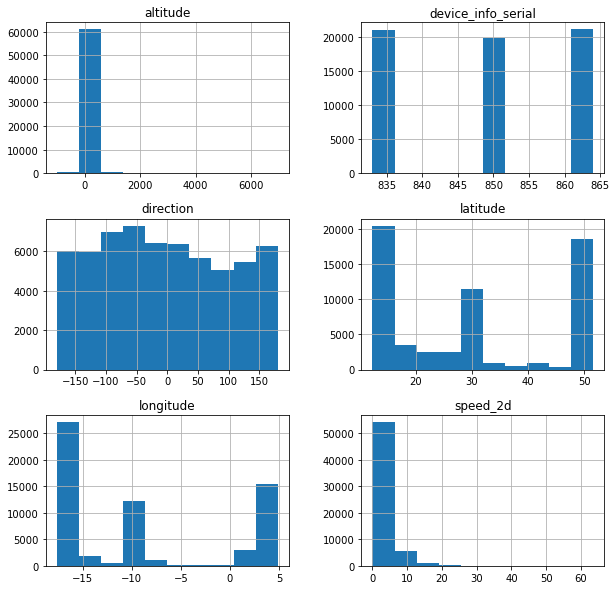

In [11]:
# Enable matplotlib
%matplotlib inline

# View histograms for all numeric variables
histograms = df.hist(figsize=(10, 10))

## Speed Comparison of Individual Birds

In [12]:
# Get datasets for each individual bird by name
eric_df = df[df.bird_name == 'Eric']
nico_df = df[df.bird_name == 'Nico']
sanne_df = df[df.bird_name == 'Sanne']

In [13]:
# Compare min, max, and mean speed of each bird
def speed_stats(data):
    min_speed = round(min(data.speed_2d), 2)
    max_speed = round(max(data.speed_2d), 2)
    mean_speed = round(np.mean(data.speed_2d), 2)
    median_speed = round(stats.median(data.speed_2d), 2)
    mode_speed = round(stats.mode(data.speed_2d), 2)
    speed_std = round(np.std(data.speed_2d), 2)
    speed_var = round(np.var(data.speed_2d), 2)
    return f"""Bird Name: {max(data.bird_name)}
Minimum Speed: {min_speed} m/s
Maximum Speed: {max_speed} m/s
Mean Speed: {mean_speed} m/s
Median Speed: {median_speed} m/s
Mode Speed: {mode_speed} m/s
Standard Deviation: {speed_std} m/s
Speed Variance: {speed_var}
"""

In [14]:
print(speed_stats(eric_df))

Bird Name: Eric
Minimum Speed: 0.0 m/s
Maximum Speed: 63.49 m/s
Mean Speed: 2.3 m/s
Median Speed: 0.08 m/s
Mode Speed: 0.08 m/s
Standard Deviation: 3.57 m/s
Speed Variance: 12.72



In [15]:
print(speed_stats(nico_df))

Bird Name: Nico
Minimum Speed: 0.0 m/s
Maximum Speed: 48.38 m/s
Mean Speed: 2.91 m/s
Median Speed: 2.62 m/s
Mode Speed: 0.09 m/s
Standard Deviation: 3.74 m/s
Speed Variance: 13.96



In [16]:
print(speed_stats(sanne_df))

Bird Name: Sanne
Minimum Speed: 0.0 m/s
Maximum Speed: 57.2 m/s
Mean Speed: 2.45 m/s
Median Speed: nan m/s
Mode Speed: 0.09 m/s
Standard Deviation: 3.39 m/s
Speed Variance: 11.46



Nico had the fastest average speed, while Eric had the highest maximum speed. Sanne had the most consistent
speed (lowest standard deviation).

In [17]:
# Convert speeds from m/s to miles per hour
speeds_ms = df.speed_2d
df['speeds_mph'] = list(map(lambda x: x * 2.237, speeds_ms))

In [18]:
# Get mean speed for each bird in mph
names = list(df.bird_name.unique())
mean_speed_mph = [round(np.mean(df.speeds_mph[df.bird_name==name]), 2) for name in names]
for name, speed in zip(names, mean_speed_mph):
    print(f"{name}'s mean speed in miles per hour was {speed}.")

Eric's mean speed in miles per hour was 5.15.
Nico's mean speed in miles per hour was 6.51.
Sanne's mean speed in miles per hour was 5.48.


## Mapping Routes

In [19]:
# Find min and max of latitude and longitude
min_lon = min(df.longitude)
max_lon = max(df.longitude)
min_lat = min(df.latitude)
max_lat = max(df.latitude)
print(f"""Min Lon: {min_lon}
Max Lon: {max_lon}
Min Lat: {min_lat}
Max Lat: {max_lat}
""")

Min Lon: -17.6261451
Max Lon: 4.8575613
Min Lat: 12.354424
Max Lat: 51.5184521



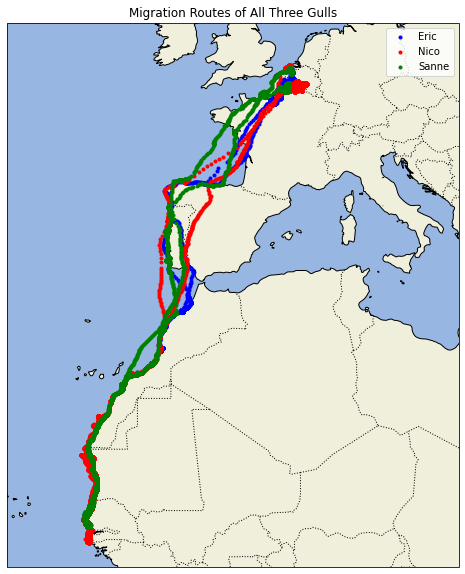

In [20]:
# # Set figure size for map
# plt.figure(figsize = (10, 10))

# List of colors to use for birds
colors = ['blue', 'red', 'green']

# Define function to map migration routes
def route_map(name_list, color_list):
    
    # Set figure size for map
    plt.figure(figsize = (10, 10))
    
    # Choose map projection
    projection = ccrs.Mercator()

    # Create axis object
    ax = plt.axes(projection = projection)

    # Set extent of x and y coordinates for map
    ax.set_extent((-25.0, 20.0, 52.0, 10.0))

    # Add map features with cartopy
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle = ':')

    # Get bird migration data
    for bird, color in zip(name_list, color_list):
        index = df.bird_name == bird
        x = df.longitude[index]
        y = df.latitude[index]
        ax.plot(x, y, '.', transform = ccrs.Geodetic(), label = bird, color = color)
    plt.title('Migration Routes of All Three Gulls')
    plt.legend()

# Call function with name and color lists
route_map(names, colors)

All three birds took roughly the same route, with some variations between France, Spain, and Portugal. It looks like Nico and Sanne went further south for the winter than Eric.

## Mapping Individual Routes With Stops

In [21]:
# Separate data into stopped and moving points
stops = df[df.speed_2d <= 1]
moving = df[df.speed_2d > 1]

In [22]:
# Plot moving and stopping points for each bird

def stops_map(bird):
    plt.figure(figsize = (10, 10))
    
    # Choose map projection
    projection = ccrs.Mercator()

    # Create axis object
    ax = plt.axes(projection = projection)

    # Set extent of x and y coordinates for map
    ax.set_extent((-25.0, 20.0, 52.0, 10.0))

    # Add map features with cartopy
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle = ':')

    stops_x = stops.longitude[stops.bird_name == bird]
    stops_y = stops.latitude[stops.bird_name == bird]
    moving_x = moving.longitude[moving.bird_name == bird]
    moving_y = moving.latitude[moving.bird_name == bird]
    ax.plot(moving_x, moving_y, '.', transform = ccrs.Geodetic(), color = 'limegreen', label = 'Moving') 
    ax.plot(stops_x, stops_y, '.', transform = ccrs.Geodetic(), color = 'firebrick', label = 'Stopped')
    plt.title(f'Migration Route of {bird}')
    plt.legend()

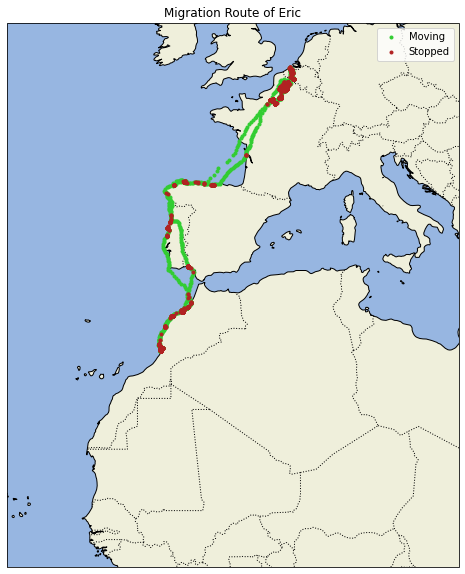

In [23]:
# Create map for Eric
stops_map('Eric')

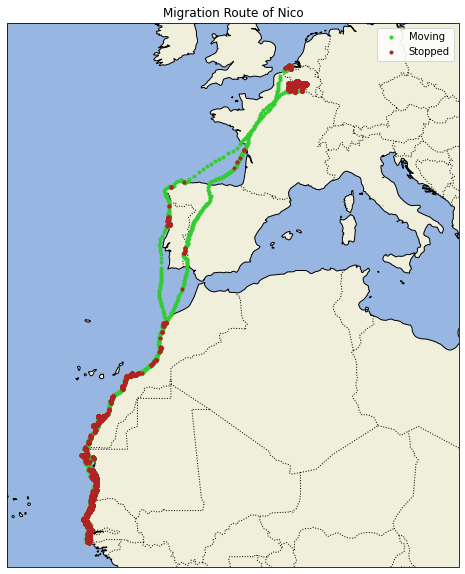

In [24]:
# Create Map for Nico
stops_map('Nico')

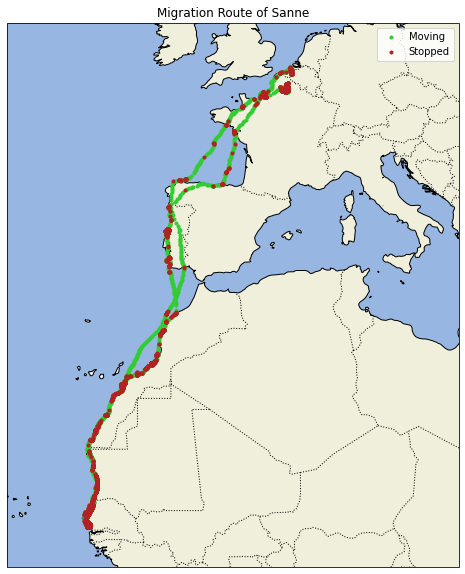

In [25]:
# Create map for Sanne
stops_map('Sanne')

Nico and Sanne traveled much further south than Eric. The number of stopped points in the southern regions suggests that they may have continued to move and settle repeatedly through the winter. Sanne seems to be prone to resting on boats between France and Spain, due to multiple stops over a water region.